### Problem Statement <br>
#### Dataset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the X types of wines.


 
As a Data Scientist working on this dataset you have been asked to complete the following tasks:
1. Create clusters for the different types of wines  
2. Infer patterns based on clusters formed to draw business insights


Throughout this demo, we will be using the Hierarchical clustering algorithm to group the products into clusters

Overview of the broad steps involved:
 1. Loading the data set and the required libraries
 2. Preparing data for model building
  *  Removing Null values from the data
  *  Sampling data points for Hierarchical clustering
  *  Applying standardization on the dataset
 4. Feature selection for product clustering
 5. Building clustering models
 6. Calculating reorder rates for clusters based on different parameters
 7. Comparison analysis and summarization
 

### 1. Loading data set and the required libraries


In [2]:
### 1.Loading the libraries and required libraries 
# Importing ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from IPython.display import display
%matplotlib inline
plt.style.use('ggplot')

import sklearn
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
sns.set()

In [3]:
# Loading the wine dataset into pandas dataframes

wine_df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/wine.data.csv')
wine_df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
#Checking for null values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
# Class is indicative of clusters, but in real life, you'll not find this label, you'll have to infer it from the output of the clustering algorithm
wine_df.Class.unique()

array([1, 2, 3])

In [7]:
#Using the describe function to check data distribution of the dataset
wine_df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 2. Preparing the data for Clustering

1.  Dropping irrelevant columns

In [8]:
# We drop the Class column here to avoid target leakage
temp = wine_df.drop('Class', axis = 1).copy()

In [9]:
#let us now look at the updated dataset
temp.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2.  ####   Scaling with StandardScaler 

As we learned before, scaling is essential for clustering algorithms. In this demo, we'll be using *standardization* as the scaling method

In [10]:
#Scaling the values using the sklearn standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()         
temp_scaled = scaler.fit_transform(temp)


In [11]:
#Let us now print the values after standardization
temp_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

### 3. Building Clustering Models - Part II

#### 1.   Hierarchical Clustering:

Now that our data has been sampled and scaled, we can start with applying the Hierarchical clustering algorithm. We will enable truncate_mode to the top 30 clusters so that we can make sense of the clusters that are formed.




#### 1. Single Linkage





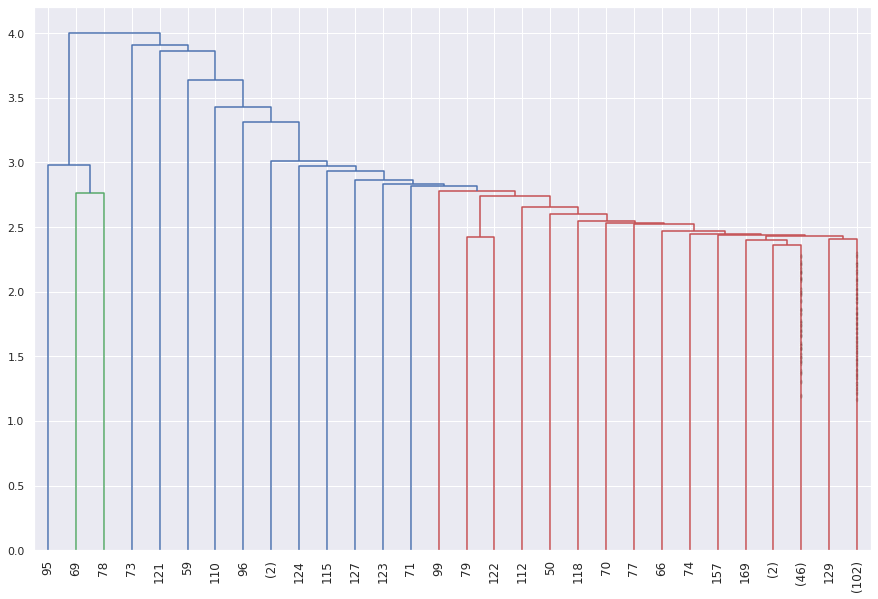

In [14]:
# Single linkage dendrogram. Here, truncate_mode is used to limit the total clusters that we can see by last 30 clusters so that the resultant dendrogram makes sense.
mergings_single = linkage(temp_scaled, method="single", metric='euclidean')
plt.figure(figsize=(15,10))
dendrogram(mergings_single, truncate_mode='lastp',
            p=30,
            leaf_rotation=90,
            leaf_font_size=12,
            show_contracted=True                                  
          )
plt.show()

#### 2. Complete Linkage


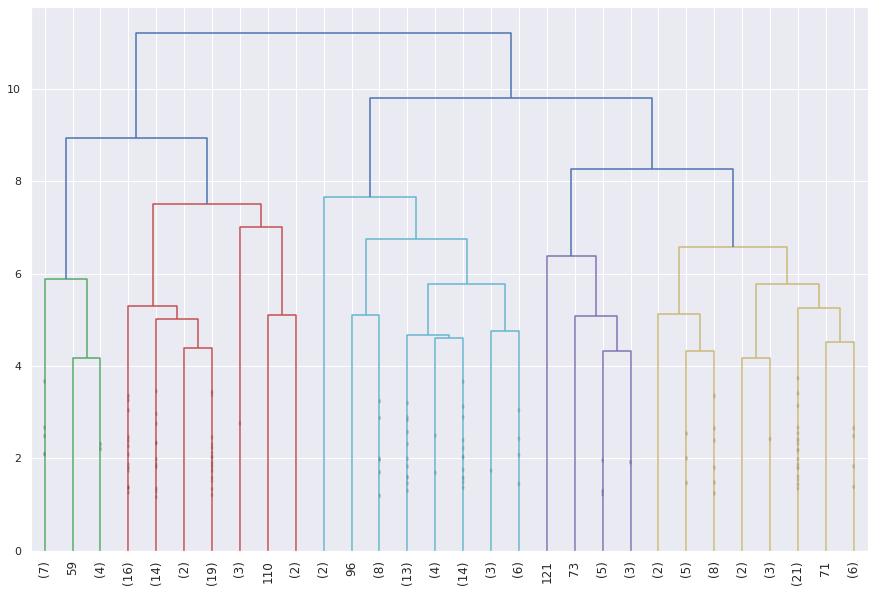

In [15]:

# Complete linkage dendrogram. Same as before, truncate_mode is used to limit the total clusters that we can see by last 30 clusters so that the resultant dendrogram makes sense.
mergings_complete = linkage(temp_scaled, method="complete", metric='euclidean')
plt.figure(figsize=(15,10))
dendrogram(mergings_complete, truncate_mode='lastp',
            p=30,
            leaf_rotation=90,
            leaf_font_size=12,
            show_contracted=True
          )
plt.show()

#### 3. Average Linkage


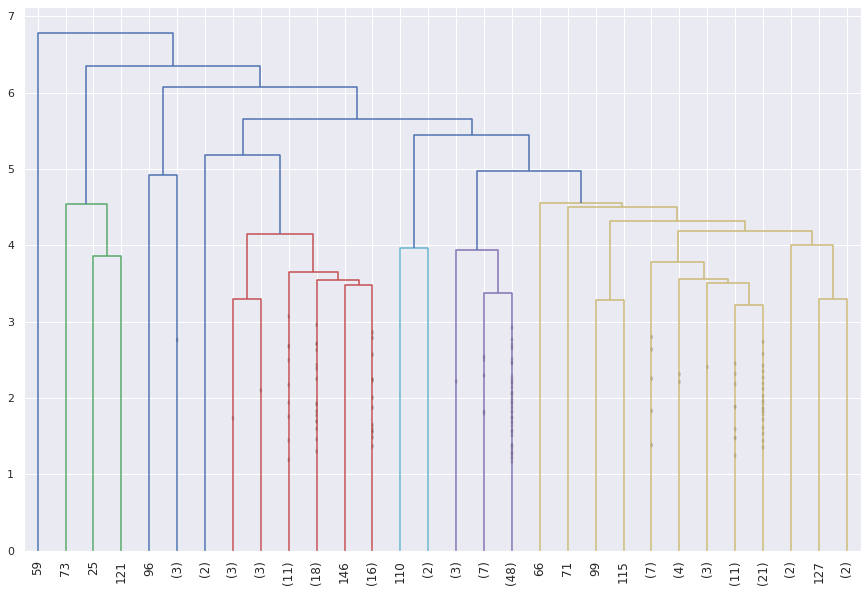

In [16]:

# Average linkage dendrogram. Same as before, truncate_mode is used to limit the total clusters that we can see by last 30 clusters so that the resultant dendrogram makes sense.
mergings_average = linkage(temp_scaled, method="average", metric='euclidean')
plt.figure(figsize=(15,10))
dendrogram(mergings_average, truncate_mode='lastp',
            p=30,
            leaf_rotation=90,
            leaf_font_size=12,
            show_contracted=True
          )
plt.show()

#### Analyzing both the Hierarchical clusters above, we can see that the complete linkage Hierarchical clustering provides us with more meaninful clusters considering that we are supposed to create 3-4 clusters

#### From the complete linkage dendrogram, we can visually see 4 different clusters being made. Hence, let us take the top 4 clusters from the dendrogram

In [17]:
# Taking top 3 clusters from the dendrogram
h_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
h_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

The following code gives us the distances at which the last 4 merges happen

In [18]:
print('distances for the last 4 merges:\n{}'.format(mergings_complete[-4:,2]))

distances for the last 4 merges:
[ 8.269697    8.93127593  9.81074299 11.21149606]


In [19]:
# assigning the label to data points
wine_df['cluster_id'] = h_labels
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


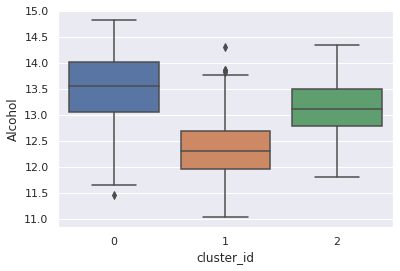

In [20]:
# Let's now plot parameter of interest (reorder_rate) with different cluster ids and see if we could find a pattern
sns.boxplot(x='cluster_id', y='Alcohol', data=wine_df)

In [21]:
wine_df.groupby('cluster_id').agg('mean')

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
cluster_id,,,,,,,,,,,,,,
0,1.260870,13.406087,1.898986,2.305797,16.772464,105.000000,2.643913,2.668986,0.296667,1.832899,4.990725,1.069652,2.970000,984.695652
1,1.862069,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
2,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196


#### **Summary**


We have three different clusters in our complete linkage Hierarchical clustering model, each with different reorder rates and notably different number of products and average number of orders with the cluster.

* 
* 
*

